In [1]:
from samana.Data.he0435 import HE0435_NIRCAM
from samana.Model.he0435_model_nircam import HE0435ModelNircamEPLM1M3M4ShearObservedConvention
import numpy as np
import h5py
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence
from lenstronomy.Data.coord_transforms import Coordinates

### We model the observed position of the companion galaxy with the observed_convention_index in lenstronomoy

In [2]:
data = HE0435_NIRCAM()
model = HE0435ModelNircamEPLM1M3M4ShearObservedConvention(data, shapelets_order=28)

kwargs_lens_macro_init = None
observed_convention_index = [2]
kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init,
                                                observed_convention_index=observed_convention_index)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_constraints = model.kwargs_constraints
fitting_sequence_1 = FittingSequence(data.kwargs_data_joint, kwargs_model, kwargs_constraints, 
                                  model.kwargs_likelihood, kwargs_params)

nthreads = 10
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a4_a', 'a3_a', 'a1_a','delta_phi_m1', 'delta_phi_m3', 'delta_phi_m4'], 
                                                 [0.0, 0.0, 0.0,0.0, 0.0, 0.0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 10, 'n_iterations': 100, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 1, 'keep_psf_variance_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 10, 'n_iterations': 50, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 1, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 30, 'n_iterations': 60, 'threadCount': nthreads}],
        #['MCMC', {'n_burn': 50, 'n_run': 40, 'walkerRatio': 4, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list_1 = fitting_sequence_1.fit_sequence(fitting_kwargs_list)
kwargs_result_1 = fitting_sequence_1.best_fit()
# print(fitting_sequence_1.bic)

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


Computing the PSO ...


  0%|                                                                                                                                                                | 0/100 [00:00<?, ?it/s]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
  1%|█▌                                                                                                                                                      | 1/100 [00:09<15:21,  9.31s/it]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: R

Max iteration reached! Stopping.
-1.5547296781300541 reduced X^2 of best position
-13655.190763016266 log likelihood
17566 effective number of data points
[{'theta_E': 1.1743867906551413, 'gamma': 2.054022155801663, 'e1': -0.09046902942594912, 'e2': -0.04990087109966144, 'center_x': 0.023034581828763293, 'center_y': 0.04568517504929267, 'a1_a': 0.0, 'delta_phi_m1': 0.0, 'a3_a': 0.0, 'delta_phi_m3': 0.0, 'a4_a': 0.0, 'delta_phi_m4': 0.0}, {'gamma1': 0.02824951006081594, 'gamma2': 0.042447105772238106, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.4473784848754577, 'center_x': -2.420034090984845, 'center_y': -3.618397552314325}] lens result
[{'amp': 1, 'R_sersic': 0.5958093330534845, 'n_sersic': 4.245672985649488, 'e1': 0.4659348574508791, 'e2': -0.0002768221738040078, 'center_x': -0.2180401463109526, 'center_y': -0.2823629359345644}, {'amp': 1, 'n_max': 28, 'beta': 0.19531438313426236, 'center_x': -0.2180401463109526, 'center_y': -0.2823629359345644}] source result
[{'amp': 1, 'R_sersic': 1

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


-1.514128956805501 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.514128956805978
(25, ['gamma_lens0', 'gamma1_lens1', 'gamma2_lens1', 'theta_E_lens2', 'center_x_lens2', 'center_y_lens2', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:1121: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


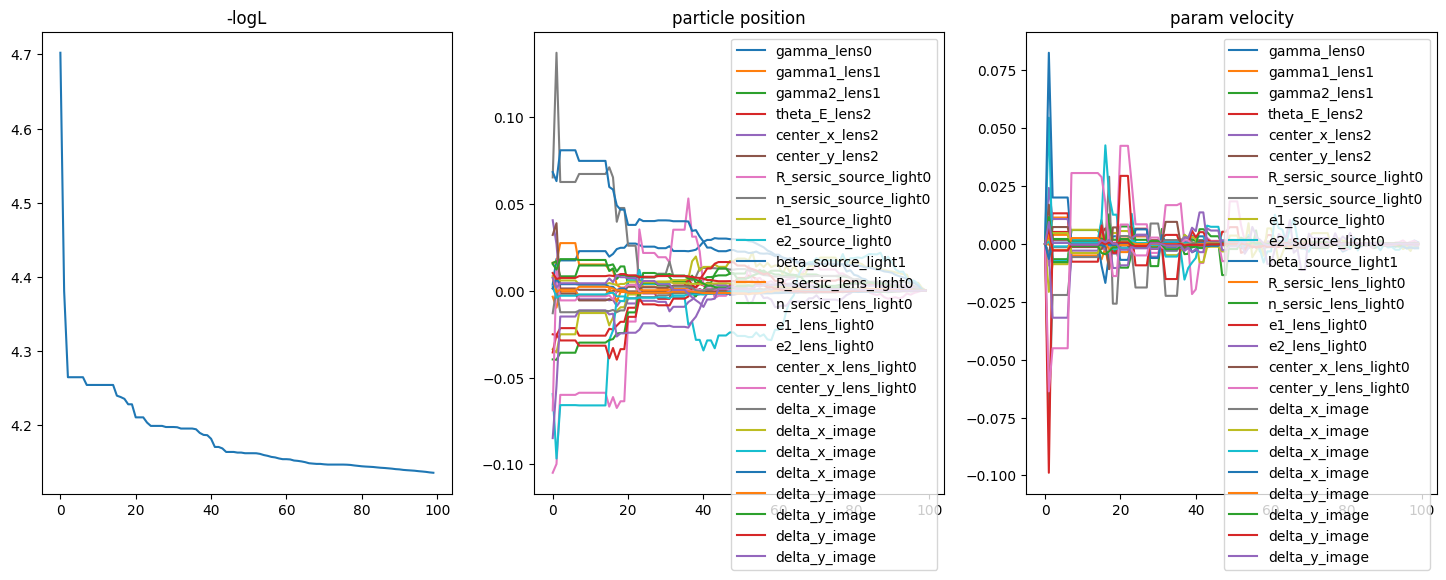

<Figure size 640x480 with 0 Axes>

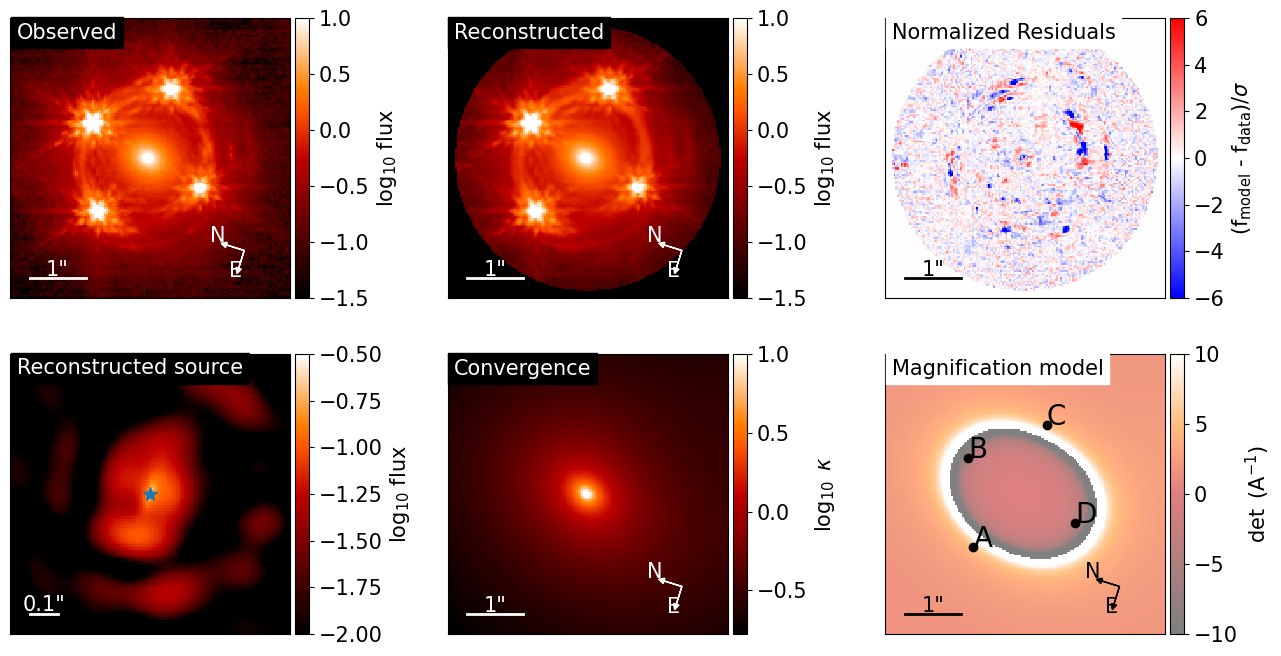

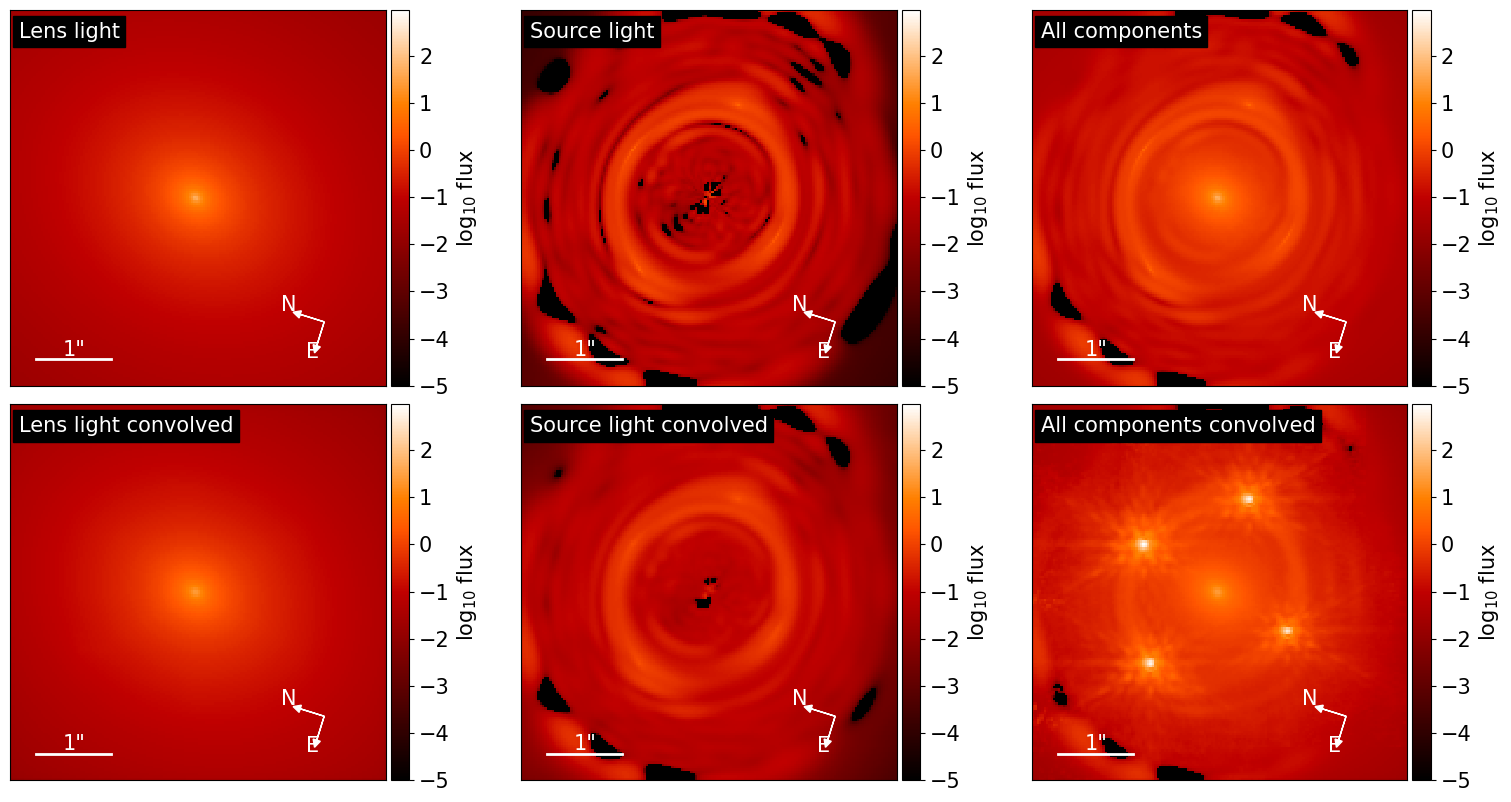

{'kwargs_lens': [{'theta_E': 1.1743867906551413, 'gamma': 2.054022155801663, 'e1': -0.09046902942594912, 'e2': -0.04990087109966144, 'center_x': 0.023034581828763293, 'center_y': 0.04568517504929267, 'a1_a': 0.0, 'delta_phi_m1': 0.0, 'a3_a': 0.0, 'delta_phi_m3': 0.0, 'a4_a': 0.0, 'delta_phi_m4': 0.0}, {'gamma1': 0.02824951006081594, 'gamma2': 0.042447105772238106, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.4473784848754577, 'center_x': -2.420034090984845, 'center_y': -3.618397552314325}], 'kwargs_source': [{'amp': 10.291819117285987, 'R_sersic': 0.5958093330534845, 'n_sersic': 4.245672985649488, 'e1': 0.4659348574508791, 'e2': -0.0002768221738040078, 'center_x': -0.2180401463109526, 'center_y': -0.2823629359345644}, {'amp': array([ 8.63713807e+02,  1.04305736e+02, -3.59589014e+01,  9.02745873e+01,
       -6.09910429e+01, -7.81672808e+01, -3.33369638e+01, -1.04445076e+02,
        1.30676903e+01,  5.54197371e+00,  1.97602762e+02,  7.59095098e+00,
        1.90301854e+02, -3.37073742e+01,  

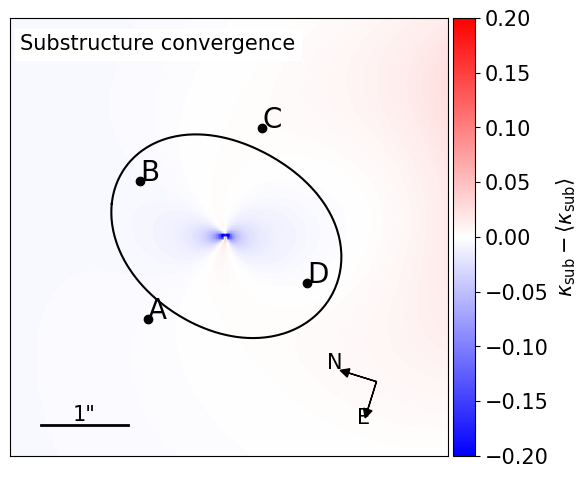

In [3]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt

multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result_1, arrow_size=0.02, cmap_string="gist_heat",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

param_class = fitting_sequence_1.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list_1)):
    chain_plot.plot_chain_list(chain_list_1, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0], v_min=-1.5, v_max=1.)
modelPlot.model_plot(ax=axes[0,1], v_min=-1.5, v_max=1.)
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100, 
                      v_min=-2.0, v_max=-0.5)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()
# -1.349
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = plt.subplot(111)
kwargs_plot = {'ax': ax,
               'index_macromodel': [0, 1, 2], 
              'with_critical_curves': True,
              'v_min': -0.2,'v_max': 0.2}
modelPlot.substructure_plot(band_index=0, **kwargs_plot)
print(kwargs_result_1)

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


-1.9023238118053607


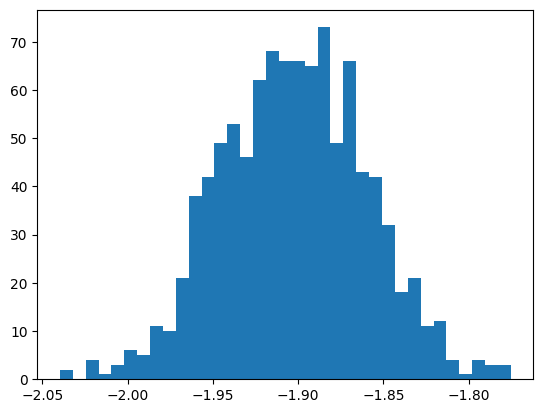

0.04256172845165711
-3.106521715784692


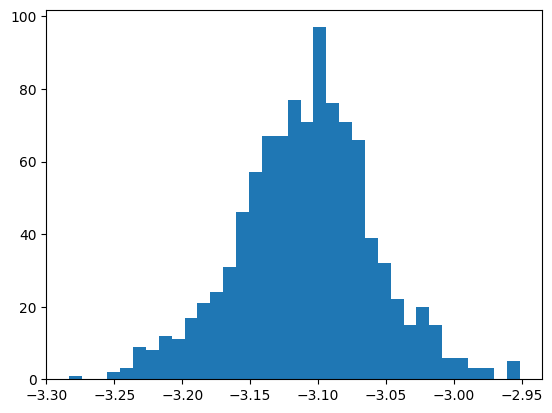

0.0501299602796059


In [4]:
from lenstronomy.LensModel.lens_model import LensModel
from copy import deepcopy
lens_model = LensModel(kwargs_model['lens_model_list'], 
                      lens_redshift_list=kwargs_model['lens_redshift_list'], z_source=kwargs_model['z_source'],
                      observed_convention_index=kwargs_model['observed_convention_index'], multi_plane=True)
center_x_phys = []
center_y_phys = []

for (dx, dy) in zip(np.random.normal(0.0, 0.05, 1000), np.random.normal(0.0, 0.05, 1000)):
    kw = deepcopy(kwargs_result_1['kwargs_lens'])
    kw[2]['center_x'] += dx
    kw[2]['center_y'] += dy
    kwargs_phys = lens_model.lens_model._convention(kw)
    center_x_phys.append(kwargs_phys[2]['center_x'])
    center_y_phys.append(kwargs_phys[2]['center_y'])

print(np.median(center_x_phys))
plt.hist(center_x_phys,bins=35); plt.show()
print(np.std(center_x_phys))

print(np.median(center_y_phys))
plt.hist(center_y_phys,bins=35); plt.show()
print(np.std(center_y_phys))

In [5]:
# plt.imshow(np.log10(fitting_sequence_1.multi_band_list[0][1]['kernel_point_source']), origin='lower')
# plt.show()
# plt.imshow(np.log10(fitting_sequence_1.multi_band_list[0][1]['psf_variance_map']), origin='lower')
# plt.show()
# plt.imshow(np.log10(fitting_sequence_1.multi_band_list[0][1]['kernel_point_source_init']),origin='lower')

# import sys
# import os
# np.set_printoptions(threshold=sys.maxsize)
# path_to_data = os.getenv('HOME')+'/Code/samana/samana/Data/ImageData/'
# with open(path_to_data+'he0435_f115W.py', 'w') as f:
#     f.write('import numpy as np\n\n')
#     f.write('image_data = np.'+str(repr(data.kwargs_data['image_data'])))
#     f.write('\n')
#     f.write('psf_model = np.'+str(repr(fitting_sequence_1.multi_band_list[0][1]['kernel_point_source'])))
#     f.write('\n')
#     f.write('psf_model_init = np.'+str(repr(fitting_sequence_1.multi_band_list[0][1]['kernel_point_source_init'])))
#     f.write('\n')
#     f.write('psf_error_map = np.'+str(repr(fitting_sequence_1.multi_band_list[0][1]['psf_variance_map'])))
#     f.write('\n')
# f.close()